In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


https://www.kaggle.com/code/brsdincer/impressionist-painting-ai-dcgan-process

https://www.kaggle.com/datasets/delayedkarma/impressionist-classifier-data?select=training

In [ ]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

In [ ]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
Main_Train_Path = Path(r'C:\Users\IN205\Desktop\AI_bangh\archive\training\training\VanGogh')
Main_Train_Path

WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh')

Main_Train_Path 변수는 파일 경로를 저장하는 데 사용되는 변수입니다. 코드에서 보이는 파일 경로는 데이터셋의 훈련 이미지들이 저장되어 있는 디렉토리의 경로를 나타냅니다.

여기서 Path는 pathlib 패키지에 있는 클래스입니다. pathlib은 파일 경로와 디렉토리 경로를 다루기 위한 유용한 메소드와 클래스들을 제공합니다.

In [ ]:
Train_JPG_Path = list(Main_Train_Path.glob("**/*.jpg"))

Train_JPG_Path

[WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205634.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205638.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205644.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205652.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205653.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205656.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205659.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205667.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205671.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/training/training/VanGogh/205680.jpg'),
 WindowsPath('C:/Users/IN205/Desktop/AI_bangh/archive/traini

이 코드는 지정된 디렉토리에서 .jpg 확장자를 가진 파일들의 경로를 리스트로 수집하는 작업을 수행합니다.

Main_Train_Path: 이 변수는 데이터셋 내에 있는 훈련 이미지들이 저장되어 있는 디렉토리의 경로를 나타냅니다. 앞서 언급한 것처럼 Path 클래스로 경로를 나타내고 있습니다.

list(Main_Train_Path.glob(r"*/*.jpg")): glob 메서드를 사용하여 Main_Train_Path 안에 있는 모든 .jpg 확장자 파일들의 경로를 리스트로 수집합니다.

glob 메서드는 경로 패턴을 기반으로 디렉토리 내의 파일들을 찾습니다.
r"*/*.jpg"는 디렉토리 내에서 모든 하위 디렉토리의 .jpg 파일들을 찾는 경로 패턴입니다.
결과적으로 Train_JPG_Path 리스트에 .jpg 확장자를 가진 파일들의 경로가 저장됩니다.

In [ ]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))

이 코드는 주어진 Train_JPG_Path 리스트에 있는 이미지 파일 경로들을 기반으로 각 이미지의 레이블을 추출하는 과정을 수행합니다.

Train_JPG_Path: 이 변수는 이미지 파일들의 경로가 리스트로 저장되어 있는 변수입니다. 각 경로는 훈련 이미지 파일들의 위치를 나타냅니다.

list(map(lambda x: os.path.split(os.path.split(x)[0])[1], Train_JPG_Path)): 여기서 map 함수와 lambda 함수를 사용하여 각 이미지 파일의 레이블을 추출합니다.

map(lambda x: os.path.split(os.path.split(x)[0])[1], Train_JPG_Path)는 Train_JPG_Path에 있는 각 이미지 파일 경로에 대해 다음 작업을 수행합니다:
os.path.split(x)[0]는 이미지 파일의 경로에서 파일명을 제외한 상위 경로를 가져옵니다.
os.path.split(...)[1]는 상위 경로에서 마지막 폴더명을 추출합니다. 이것이 해당 이미지의 레이블이 됩니다.
따라서, 각 이미지 파일 경로에 대한 레이블이 추출되어 리스트에 저장됩니다.
결과적으로 Train_JPG_Labels 리스트에는 각 이미지 파일의 레이블이 저장됩니다.

In [ ]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([Train_JPG_Path_Series,Train_JPG_Labels_Series],axis=1)


이 코드는 두 개의 pandas Series 객체를 합쳐서 하나의 데이터프레임을 생성하는 작업을 수행합니다.

Train_JPG_Path_Series: 이미지 파일 경로로 이루어진 pandas Series 객체

Train_JPG_Labels_Series: 이미지 레이블로 이루어진 pandas Series 객체

이 두 Series를 합쳐서 하나의 데이터프레임을 생성하려는 목적입니다.

In [ ]:
print(Main_Train_Data.head(-1))

                                                   JPG CATEGORY
0    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
1    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
2    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
3    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
4    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
..                                                 ...      ...
393  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
394  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
395  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
396  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
397  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh

[398 rows x 2 columns]


In [ ]:
print(Main_Train_Data["CATEGORY"].value_counts())

CATEGORY
VanGogh    399
Name: count, dtype: int64


In [ ]:
VanGogh_IMG_Data = Main_Train_Data[Main_Train_Data["CATEGORY"] == "VanGogh"]

In [ ]:
print(VanGogh_IMG_Data.head(-1))

                                                   JPG CATEGORY
0    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
1    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
2    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
3    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
4    C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
..                                                 ...      ...
393  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
394  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
395  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
396  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
397  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh

[398 rows x 2 columns]


In [ ]:
VanGogh_IMG_Data = VanGogh_IMG_Data.reset_index()

In [ ]:
print(VanGogh_IMG_Data.head(-1))

     index                                                JPG CATEGORY
0        0  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
1        1  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
2        2  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
3        3  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
4        4  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
..     ...                                                ...      ...
393    393  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
394    394  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
395    395  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
396    396  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh
397    397  C:\Users\IN205\Desktop\AI_bangh\archive\traini...  VanGogh

[398 rows x 3 columns]


In [ ]:
plt.style.use("classic")

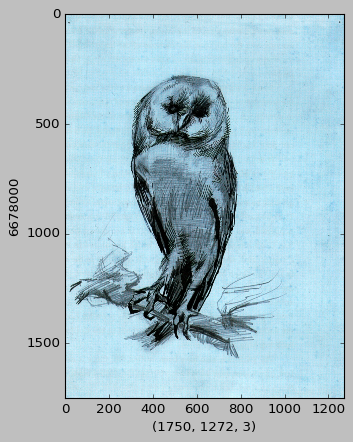

In [ ]:
example_IMG = VanGogh_IMG_Data["JPG"][20]
R_IMG = cv2.imread(example_IMG)
plt.xlabel(R_IMG.shape)
plt.ylabel(R_IMG.size)
plt.imshow(R_IMG)

example_IMG = VanGogh_IMG_Data["JPG"][20]: VanGogh_IMG_Data 데이터프레임의 "JPG" 열에서 인덱스 20에 해당하는 값, 즉 파일 경로를 example_IMG 변수에 저장합니다.

R_IMG = cv2.imread(example_IMG): OpenCV 라이브러리를 사용하여 example_IMG에 저장된 이미지 파일을 읽어와서 R_IMG 변수에 저장합니다.

plt.xlabel(R_IMG.shape): X 축 레이블을 이미지의 형태(shape) 정보로 설정합니다. 이미지 형태 정보는 (높이, 너비, 채널)으로 표시됩니다.

plt.ylabel(R_IMG.size): Y 축 레이블을 이미지의 크기(size) 정보로 설정합니다. 이미지 크기 정보는 픽셀의 총 개수를 나타냅니다.

plt.imshow(R_IMG): R_IMG에 저장된 이미지를 시각화하여 보여줍니다.

즉, 주어진 코드는 "VanGogh_IMG_Data" 데이터프레임에서 20번 인덱스에 해당하는 이미지 파일을 읽어와서 이미지의 형태와 크기를 레이블로 표시하고, 해당 이미지를 시각화하여 출력합니다.


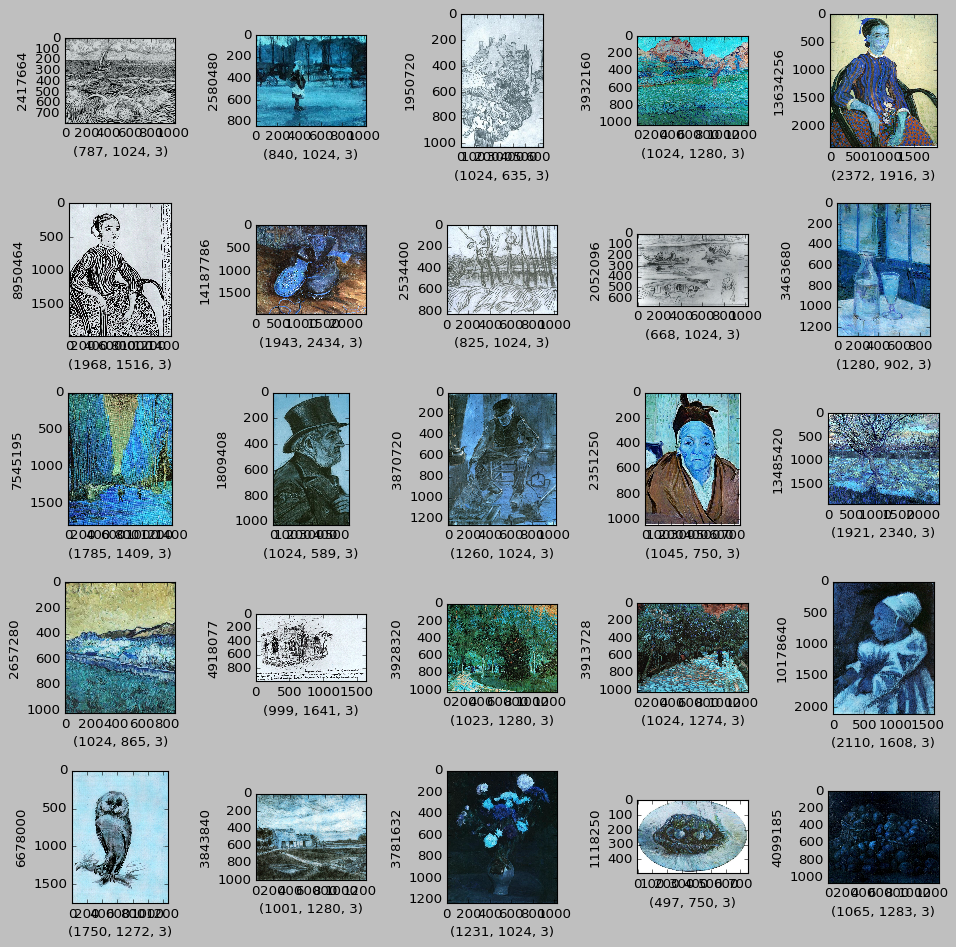

In [ ]:

figure,axis = plt.subplots(ncols=5,nrows=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(VanGogh_IMG_Data["JPG"][i])
    ax.set_xlabel(IMG.shape)
    ax.set_ylabel(IMG.size)
    ax.imshow(IMG)
plt.tight_layout()
plt.show()

In [ ]:
Transformed_X = []

for IMG_X in VanGogh_IMG_Data["JPG"]:
    X_IMG = cv2.imread(IMG_X)
    X_IMG = cv2.resize(X_IMG,(48,48))
    X_IMG = X_IMG / 255.
    Transformed_X.append(X_IMG)

In [ ]:
print(Transformed_X[2].shape)

(48, 48, 3)


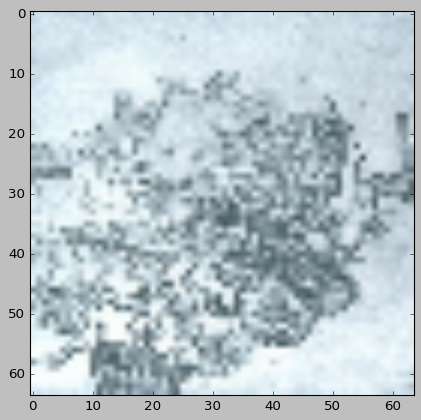

In [ ]:
plt.imshow(Transformed_X[2])

In [ ]:
Train_IMG_Set = np.asarray(Transformed_X)

Train_IMG_Set = Train_IMG_Set.reshape(-1,48,48,3)

print(Train_IMG_Set.shape)

(399, 48, 48, 3)


In [ ]:
print(Train_IMG_Set.shape)

(399, 48, 48, 3)


In [ ]:
Generator_Input = keras.Input(shape=(48,))
x = layers.Dense(128*24*24)(Generator_Input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((24,24,128))(x)

x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256,4,padding="same",strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(3,7,padding="same",activation="tanh")(x)

Generator = keras.models.Model(Generator_Input,x)

In [ ]:
print(Generator.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 48)]              0         
                                                                 
 dense_7 (Dense)             (None, 73728)             3612672   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 73728)             0         
                                                                 
 reshape_7 (Reshape)         (None, 24, 24, 128)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 256)       524544    
                                                                 
 leaky_re_lu_38 (LeakyReLU)  (None, 24, 24, 256)       0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 48, 48, 256)       1048

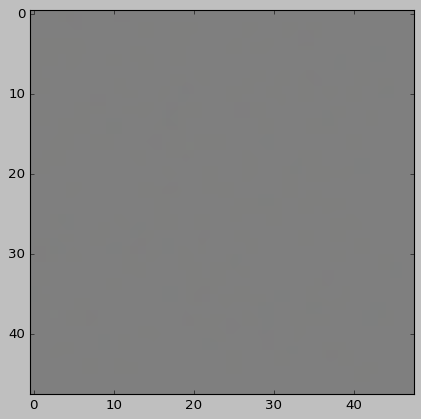

In [ ]:
T_Noise = tf.random.normal(shape=[1, 48])
G_T_Img = Generator(T_Noise, training=False)

G_T_Img_S = np.squeeze(G_T_Img, axis=0)
G_T_Img_S = (G_T_Img_S + 1) * 127.5  # 스케일을 [0, 255]로 조정
G_T_Img_S = G_T_Img_S.astype(np.uint8)  # 정수형으로 변환
plt.imshow(G_T_Img_S)
plt.show()

In [ ]:
print(T_Noise)

tf.Tensor(
[[-1.365384    1.696273   -1.8570168   0.8603965   0.12084696 -3.2248669
   0.6507019  -1.661608    0.73299444  0.41069758 -1.334239   -0.16191433
   0.34900978  0.44336575  0.9172466  -0.34321022 -0.27438554 -1.6630241
   1.1785783   1.05376    -1.8825016  -0.02077057 -0.40780163 -0.70592844
   0.18495265 -0.7569443  -0.6302277   0.03459765  0.7173746   0.9672011
  -0.76442903 -2.1131341   1.2457492   0.45741636 -1.9509263  -0.5690722
  -0.93782055 -0.11282761 -1.8208299  -1.2411145  -1.153505    0.6823016
   1.4631858   0.25628537 -0.0539178  -0.6805011  -1.7146955  -0.21266109]], shape=(1, 48), dtype=float32)


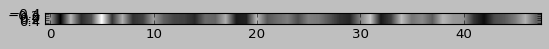

In [ ]:
plt.imshow(T_Noise,cmap="binary")

In [ ]:
Discriminator_Input = layers.Input(shape=(48,48,3)) #32,32
x = layers.Conv2D(128,3)(Discriminator_Input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,3,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)
x = layers.Dense(1,activation="sigmoid")(x)

Discriminator = keras.models.Model(Discriminator_Input,x)

In [ ]:
print(Discriminator.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 46, 46, 128)       3584      
                                                                 
 leaky_re_lu_43 (LeakyReLU)  (None, 46, 46, 128)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 22, 22, 128)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 10, 10, 128)       262272    
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 10, 10, 128)       0   

In [ ]:
Decision_IMG = Discriminator(G_T_Img)

In [ ]:
Decision_IMG = Discriminator(G_T_Img)

In [ ]:
Discriminator.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0), loss="binary_crossentropy")

In [ ]:
Discriminator.trainable = False

In [ ]:
GAN_Input = keras.Input(shape=(48,))
GAN_Output = Discriminator(Generator(GAN_Input))

In [ ]:
GAN_Model = keras.models.Model(GAN_Input,GAN_Output)

In [ ]:
GAN_Model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0002, clipvalue=1.0), loss="binary_crossentropy")

In [ ]:
print(GAN_Model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 48)]              0         
                                                                 
 model_6 (Functional)        (None, 48, 48, 3)         7452675   
                                                                 
 model_7 (Functional)        (None, 1)                 677761    
                                                                 
Total params: 8130436 (31.02 MB)
Trainable params: 7452675 (28.43 MB)
Non-trainable params: 677761 (2.59 MB)
_________________________________________________________________
None


In [ ]:
os.mkdir("painting_1_new")

In [ ]:
start = 0
batch_size = 32
iterations = 50
dim_size = 48

In [ ]:
for step in range(iterations):
    random_noise = np.random.normal(size=(batch_size,dim_size))
    generation_IMG = Generator.predict(random_noise)

    stop = start + batch_size

    real_IMG = Train_IMG_Set[start:stop]
    combined_IMG = np.concatenate([generation_IMG,real_IMG])

    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])
    labels = labels + 0.05 * np.random.random(labels.shape)

    D_LS = Discriminator.train_on_batch(combined_IMG,labels)

    random_noise = np.random.normal(size=(batch_size,dim_size))

    misleading_target = np.zeros((batch_size,1))

    A_LS = GAN_Model.train_on_batch(random_noise,misleading_target)

    start = start + batch_size

    if start > len(Train_IMG_Set) - batch_size:
        start = 0

    if step % 10 == 0:
        GAN_Model.save_weights("GAN_MODEL.h5")

        print("DISC_LOSS --> ",D_LS)
        print("ADVERSARIAL_LOSS --> ",A_LS)

        Img_X_X = image.array_to_img(generation_IMG[0] * 255., scale=False)
        Img_X_X.save(os.path.join("./painting_1_new","FAKE" + str(step)+".png"))

        Img_X_X = image.array_to_img(real_IMG[0] * 255.,scale=False)
        Img_X_X.save(os.path.join("./painting_1_new","REAL"+str(step)+".png"))

1/1 [==============================] - 0s 494ms/step
DISC_LOSS -->  0.6824560761451721
ADVERSARIAL_LOSS -->  0.7829879522323608
1/1 [==============================] - 1s 606ms/step
DISC_LOSS -->  0.707366406917572
ADVERSARIAL_LOSS -->  0.7319433689117432
1/1 [==============================] - 1s 605ms/step
DISC_LOSS -->  0.6887156963348389
ADVERSARIAL_LOSS -->  0.7362160682678223
1/1 [==============================] - 1s 617ms/step
DISC_LOSS -->  0.6916075944900513
ADVERSARIAL_LOSS -->  0.7809908986091614
1/1 [==============================] - 1s 605ms/step
DISC_LOSS -->  0.6952143907546997
ADVERSARIAL_LOSS -->  0.7702134251594543
1/1 [==============================] - 1s 618ms/step


In [ ]:
Export_Out = Path("./painting_1_new")
List_Output = list(Export_Out.glob(r"*.png"))
List_Output_Series = pd.Series(List_Output,name="PNG").astype(str)

In [ ]:
Predict_Noise = tf.random.normal(shape=[30,dim_size])

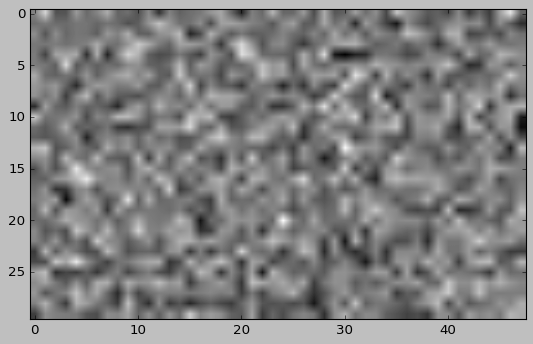

In [ ]:
plt.imshow(Predict_Noise,cmap="binary")

In [ ]:
Gen_Predict_N = Generator(Predict_Noise)

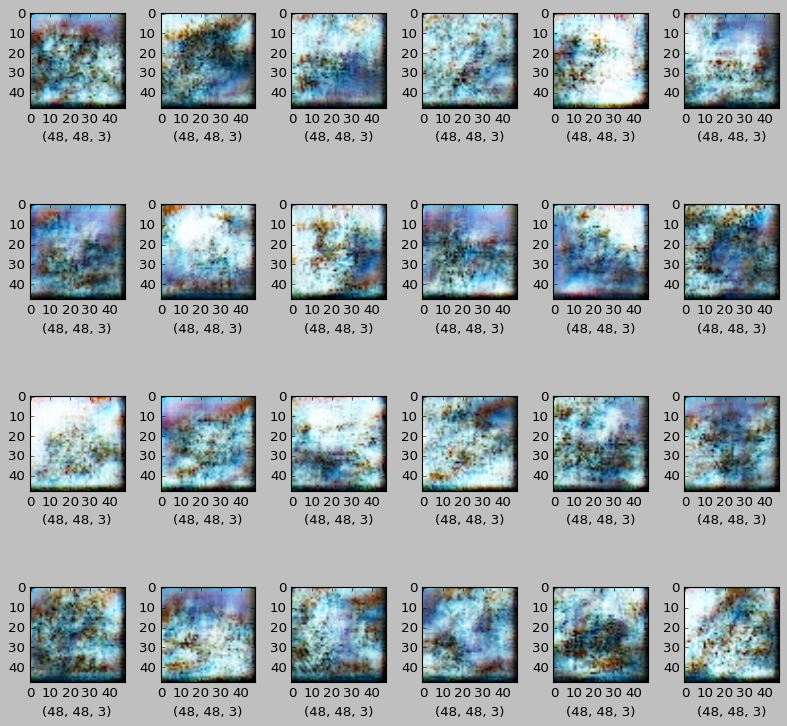

In [ ]:
figure, axes = plt.subplots(nrows=4,ncols=6,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    ax.imshow(Gen_Predict_N[i],cmap="binary")
    ax.set_xlabel(Gen_Predict_N[i].shape)
plt.tight_layout()
plt.show()

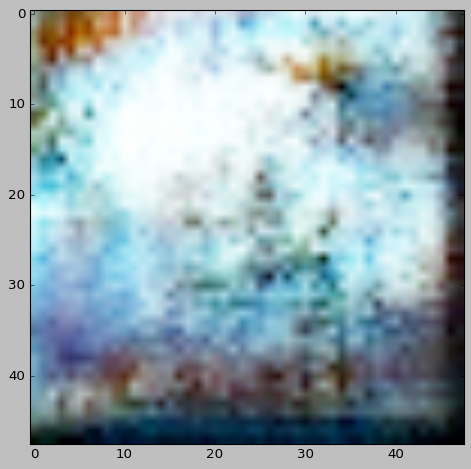

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.imshow(Gen_Predict_N[7],cmap="binary")

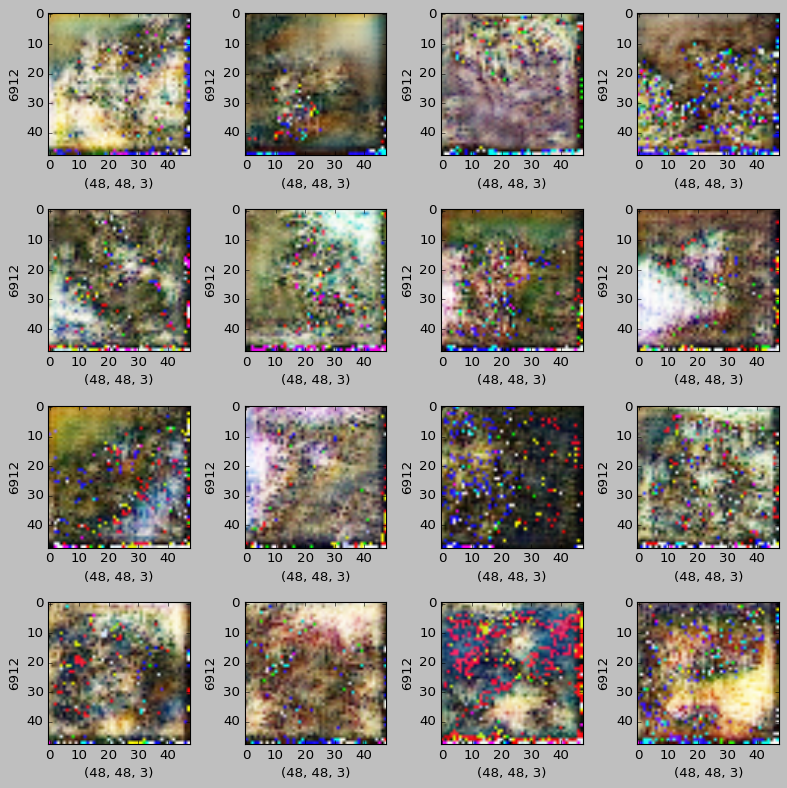

In [ ]:
figure, axes = plt.subplots(nrows=4,ncols=4,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    List_Gen_Image = cv2.imread(List_Output_Series[i])
    ax.imshow(List_Gen_Image,cmap="binary")
    ax.set_xlabel(List_Gen_Image.shape)
    ax.set_ylabel(List_Gen_Image.size)
plt.tight_layout()
plt.show()